## 勾配ブースティング

- 勾配情報を使って、徐々に残差を減らしていく
- 最初F0は平均値
- rib = yi - Fb-1(x)は損失関数の勾配になる　→ この勾配を学習
- (?) 残差 = 勾配という認識で問題ない？　→　式では理解できるけどどんな利点がある？？  
  -> だだ、r = y1 - Fb-1の今までのFを計算するのは大変かも
---

## 勾配ブースティング回帰を実装してみよう

実装すること 
1. クラス作成
2. コンストラクタの作成 =>　引数：学習率、イテレーション数、木の深さ、ランダムシード
3. 学習メソッド　
    - 引数:X, y
    - 初期モデルF_0
    - 各決定技(fb(x))を学習
4. 予測メソッド(predict)を作成
    - 学習済みの決定木f1~b(x)およびF0から最終的な予測値Fbを計算

In [91]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
class MyGradientBoosthingregressor:
    def __init__(self, leaning_rate=0.03, n_estimators=100, max_depth=1, random_state=0):
        self.leaning_rate = leaning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []
        self.F0 = None
        
        
    # 学習メソッド
    def fit(self, X, y):
        
        #　初期値F0,　更新用のFb 
        self.F0 = np.mean(y)
        Fb = self.F0
        
        
        for _ in range(self.n_estimators):
            
            #インスタンス化
            estimator = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            
            # 残差
            residual = y - Fb
            
            # 学習 => f値算出 => 全体のF値に加算
            estimator.fit(X, residual)
            weight = estimator.predict(X)
            Fb += self.leaning_rate * weight
            
            # モデルの格納
            self.estimators.append(estimator)

            
    # 予測メソッド
    def predict(self, X):
        
        # 初期値
        Fb = self.F0
        
        # fitで作成したモデル使ってFbを加算していく
        for estimator in self.estimators:
            Fb += self.leaning_rate * estimator.predict(X)
        
        # 限りなく各データのyに近いFbを返す
        return Fb

In [165]:
my_mgbr = MyGradientBoosthingregressor()
my_mgbr.fit(X, y)
a = my_mgbr.predict(X)

In [166]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, a)

3.202023390242933

In [159]:
# 検証用データセット
df = sns.load_dataset('mpg')
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values

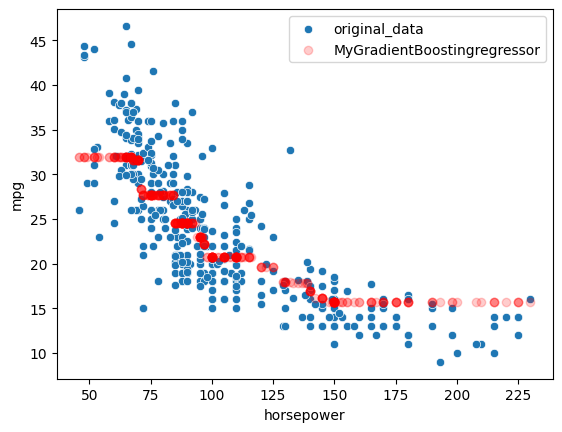

In [179]:
# 線形の確認
sns.scatterplot(data=df, x='horsepower', y='mpg', label='original_data')
plt.scatter(X, a, alpha=0.2, color='r', label='MyGradientBoostingregressor')
plt.legend()